## Measure rate of blinking by exponential fit ##  
Method adapted from Bates et. al, Science, 2007

In [122]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Change directory
os.chdir("/home/gayatri/storm/flow-chamber-exp-1/test-4")

In [113]:
import glob
import storm_analysis.sa_utilities.hdf5_to_txt as hdf5ToTxt

# Convert .hdf5 to csv

# bgs = sorted(glob.glob('background*.hdf5'))
# for movie in bgs :
#     bg_name = movie.rsplit('.hdf5',1)[0][:]
#     hdf5ToTxt.hdf5ToTxt(movie, bg_name+'.csv')

Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.


In [165]:
movie = 'movie_0002_daostorm.hdf5'
movie_name = movie.rsplit('.hdf5',1)[0][:]
# hdf5ToTxt.hdf5ToTxt(movie, movie_name+'.csv')
df = pd.read_csv(movie_name+'.csv')

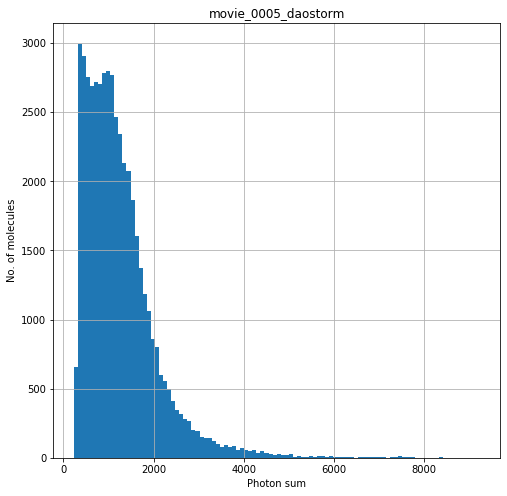

In [101]:
# import storm_analysis.jupyter_examples.overlay_image as overlay_image

# overlay_image.overlayImage("movie_0004.dax", "movie_0004_daostorm.hdf5", 20)

# df['sum'].describe()
# fig, ax = plt.subplots(figsize = (8,8))
# df['sum'].hist(bins=100, density=False)
# plt.xlim([0, 8000])
# plt.ylim([0, 500])
# plt.ylabel('No. of molecules')
# plt.xlabel('Photon sum')
# plt.title(movie_name)
# plt.savefig(movie_name + '_photon_sum')
# plt.show()

In [102]:
# For checking activation frames 

# last_frame = 500
# a1 = numpy.arange(1,last_frame,6)
# a2 = numpy.arange(2,last_frame,6)
# a3 = numpy.arange(3,last_frame,6)
# a4 = numpy.arange(4,last_frame,6)
# a5 = numpy.arange(5,last_frame,6)

# fps = 56.62835074941963
# time_period = 1/fps
# time_end = time_period*5.0
# x_data = numpy.arange(0,time_end,time_period)

In [103]:

# print(movie.rsplit('_daostorm.hdf5',1)[0][:].split('movie_00',1)[1][:])

In [166]:
# Create arrays of frame numbers as channel/non-specific.
movie_no = movie.rsplit('_daostorm.hdf5',1)[0][:].split('movie_00',1)[1][:]
cycle_list = {'01':11, '02':12, '03':13, '04':14, '05':15}
cycle_size = cycle_list[movie_no]
frame_list = {'01':1, '02':2, '03':3, '04':4, '05':5}
f = frame_list[movie_no]

last_frame = cycle_size*20

ch1 = numpy.arange(f,last_frame,cycle_size)
ns1 = numpy.arange(f+1,last_frame,cycle_size)
ns2 = numpy.arange(f+2,last_frame,cycle_size)
ns3 = numpy.arange(f+3,last_frame,cycle_size)
ns4 = numpy.arange(f+4,last_frame,cycle_size)
ns9 = numpy.arange(f+9,last_frame,cycle_size)
# ns5 = numpy.arange(10,last_frame,25)
# ns6 = numpy.arange(11,last_frame,25)
# ns7 = numpy.arange(12,last_frame,25)
# ns8 = numpy.arange(13,last_frame,25)
# ns9 = numpy.arange(14,last_frame,25)
fps = 56.62835074941963
time_period = 1/fps
time_end = time_period*5.0
x_data = numpy.arange(0,time_end,time_period)

In [167]:
# s1 = pd.Series(numpy.ravel(df.reindex(ch1).values), index=None, name='ch1')
counts = df['frame'].value_counts().sort_index()
counts_per_frame = pd.DataFrame()
# counts2 = df2['frame'].value_counts().sort_index()
# counts3 = df3['frame'].value_counts().sort_index()
# counts4 = df4['frame'].value_counts().sort_index()

In [168]:
s1 = pd.Series(numpy.ravel(counts.reindex(ch1).values), index=None, name='ch1')
s2 = pd.Series(numpy.ravel(counts.reindex(ns1).values), index=None, name='ns1')
s3 = pd.Series(numpy.ravel(counts.reindex(ns2).values), index=None, name='ns2')
s4 = pd.Series(numpy.ravel(counts.reindex(ns3).values), index=None, name='ns3')
s5 = pd.Series(numpy.ravel(counts.reindex(ns4).values), index=None, name='ns4')
s9 = pd.Series(numpy.ravel(counts.reindex(ns9).values), index=None, name='ns9')
# s6 = pd.Series(numpy.ravel(counts1.reindex(ns5).values), index=None, name='ns5')
# s7 = pd.Series(numpy.ravel(counts1.reindex(ns6).values), index=None, name='ns6')
# s8 = pd.Series(numpy.ravel(counts1.reindex(ns7).values), index=None, name='ns7')
# s9 = pd.Series(numpy.ravel(counts1.reindex(ns8).values), index=None, name='ns8')
# s10 = pd.Series(numpy.ravel(counts1.reindex(ns9).values), index=None, name='ns9')
counts_per_frame = pd.concat([s1, s2, s3, s4, s5], axis=1)
counts_last_frame = pd.concat([s9], axis=1)



In [169]:
y_data = counts_per_frame.mean().to_numpy()
print(y_data)
last = counts_last_frame.mean().to_numpy()
print(last)
# y_data2 = counts_per_frame_2.mean().to_numpy()
# y_data3 = counts_per_frame_3.mean().to_numpy()
# y_data4 = counts_per_frame_4.mean().to_numpy()

[46.45 38.4  35.35 32.65 30.65]
[23.75]


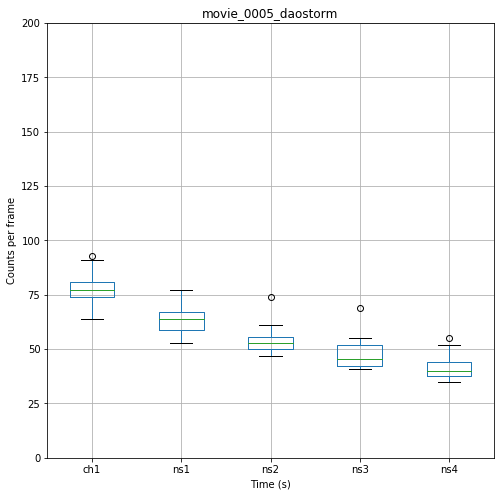

In [108]:
fig, ax = plt.subplots(figsize = (8,8))
counts_per_frame.boxplot()
plt.ylim([0, 200])
plt.ylabel('Counts per frame')
plt.xlabel('Time (s)')
plt.title(movie_name)
# plt.savefig(movie_name + '_boxplot')
plt.show()

In [109]:
# from scipy.optimize import curve_fit
# from matplotlib.offsetbox import AnchoredText

# def fit_function(t, A, k_off, c):
#     return (A * numpy.exp(-k_off * t) + c)

# def fit_function(t, A, k_off, c):
#     return (-A * numpy.exp(k_off * t) + c)

# popt1, pcov1 = curve_fit(fit_function, xdata=x_data, ydata=y_data1, p0=[90.0, 20, 5])
# popt2, pcov2 = curve_fit(fit_function, xdata=x_data, ydata=y_data2, p0=[90.0, 20, 5])
# popt3, pcov3 = curve_fit(fit_function, xdata=x_data, ydata=y_data3, p0=[90.0, 20, 5])
# popt4, pcov4 = curve_fit(fit_function, xdata=x_data, ydata=y_data4, p0=[90.0, 20, 5])

# popt, pcov = curve_fit(fit_function, xdata=x_data, ydata=y_data, p0=[10.0, 5, 5])

# float_formatter = "{:.2f}".format
# numpy.set_printoptions(formatter={'float_kind':float_formatter})

# fig, ax = plt.subplots(figsize = (8,8))

# p1 = plt.scatter(x_data, y_data, s=10, alpha=0.5, c='teal')
# x_new = numpy.linspace(numpy.min(x_data),numpy.max(x_data), num=1500)
# p = plt.plot(x_new, fit_function(x_new, *popt), color='darkorange', linewidth=2.5, label=r'Fit function')
# p2 = plt.plot(x_new, fit_function(x_new, *popt1), color='darkorange', linewidth=2.5, label=r'Fit function')
# p3 = plt.plot(x_new, fit_function(x_new, *popt2), color='forestgreen', linewidth=2.5, label=r'Fit function')
# p4 = plt.plot(x_new, fit_function(x_new, *popt3), color='deepskyblue', linewidth=2.5, label=r'Fit function')
# p5 = plt.plot(x_new, fit_function(x_new, *popt4), color='mediumpurple', linewidth=2.5, label=r'Fit function')

# text1 = '60mW '+ r'$t_{off}$' + ' ' + str(numpy.around((-numpy.log(0.1)/popt1[1])*fps,1)) + ' frames'
# text2 = '70mW '+ r'$t_{off}$' + ' ' + str(numpy.around((-numpy.log(0.1)/popt2[1])*fps,1)) + ' frames'
# text3 = '80mW '+ r'$t_{off}$' + ' ' + str(numpy.around((-numpy.log(0.1)/popt3[1])*fps,1)) + ' frames'
# text4 = '90mW '+ r'$t_{off}$' + ' ' + str(numpy.around((-numpy.log(0.1)/popt4[1])*fps,1)) + ' frames'

# at1 = AnchoredText(text1, loc='upper center', prop=dict(size=12, color='darkorange'), frameon=True)
# at1.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")

# at2 = AnchoredText(text2, loc='upper right', prop=dict(size=12, color='forestgreen'), frameon=True)
# at2.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")

# at3 = AnchoredText(text3, loc='center', prop=dict(size=12, color='deepskyblue'), frameon=True)
# at3.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")

# at4 = AnchoredText(text4, loc='center right', prop=dict(size=12, color='mediumpurple'), frameon=True)
# at4.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")

# ax.add_artist(at1)
# ax.add_artist(at2)
# ax.add_artist(at3)
# ax.add_artist(at4)

# ax.legend(labels = (text1, text2, text3, text4))

# plt.ylabel('Counts per frame')
# plt.xlabel('Time (s)')

# plt.savefig('on_rate_60mW')
# plt.show()


In [110]:
# Solve for time.
# k = popt[1]
# A0 = popt[0]
# c = popt[2]

# half_life = numpy.log(2)/k
# print('Half-life : ', half_life)

In [111]:
# no_of_frames = half_life*56.6
# print('No. of frames to switch off half the molecules : ', no_of_frames)

In [112]:
# Time taken for 90% of molecules to switch off.A0

# no_fr1 = numpy.around((-numpy.log(0.2)/popt1[1])*fps,3)
# no_fr2 = numpy.around((-numpy.log(0.2)/popt2[1])*fps,3)
# no_fr3 = numpy.around((-numpy.log(0.2)/popt3[1])*fps,3)
# no_fr4 = numpy.around((-numpy.log(0.2)/popt4[1])*fps,3)

# print('No. of frames to switch off 80% of the molecules : ')
# print('60 mW :', numpy.around(no_fr1,1))
# print('70 mW :', numpy.around(no_fr2,1))
# print('80 mW :', numpy.around(no_fr3,1))
# print('90 mW :', numpy.around(no_fr4,1))

In [171]:
bg = 'background_0005_405_daostorm.hdf5'
bg_name = bg.rsplit('.hdf5',1)[0][:]
background = pd.read_csv(bg_name+'.csv')
counts = background['frame'].value_counts().sort_index()
counts.mean()
    # bg_mean = counts.mean().to_numpy()

    

74.99